<a href="https://colab.research.google.com/github/angelo-min/intelligenza_artificiale/blob/main/alzheimer_patients_anlysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

link al notebook: https://colab.research.google.com/drive/1Bkrwh4X-Wnr0FyUJXBEuTSI_s1d3cKK3#scrollTo=-6Qdbt2KvEOj


#Studio su pazienti affetti da Alzheimer
Lo studio è stato effettuato su pazienti di diverse età, con diverso stato socio-economico (definito come un valore intero da 1 a 5) e diverso grado di educazione.

I pazienti vengono divisi in 3 classi principali:
- demented
- nondemented
- converted (i pazienti che passano da uno stato all'altro)

I parametri considerati sono:
- età
- grado di educazione
- stato socio-economico
- Mini Mental State Examination
- Grado di demenza clinica
- volume stimato totale intracraniale
- valore normalizzato del volume totale del cervello
- Fattore di scala Atlas

In questo caso creeremo un modello di Machine Learning supervisionato: abbiamo due file, uno, di training, con dati già etichettati e l'altro, di testing, con dati non ancora etichettati.

Questo progetto prende spunto da un Colab sull'analisi del fiore Iris:
- http://blueowlpress.com/wp-content/uploads/IrisTutorialPart1.html
- http://blueowlpress.com/wp-content/uploads/IrisTutorialPart2.html

In [ ]:
#importazioni librerie necessarie per la creazione del Machine Learning model
import sys
import scipy 
import numpy as np
import matplotlib 
import pandas 
import sklearn 

In [ ]:
#caricamento librerie necessarie

from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#abilitiamo funzione inline per matplotlib

%matplotlib inline

#impostiamo uno stile per la visualizzazione dei dati (scegliamo il tema dark come sfondo)

sns.set(style="dark", color_codes=True)

In [ ]:
# Carichiamo il dataset nel dataframe di pandas (lo chiamo alzheimer)
# Il dataset utilizzato è stato fornito dall'Università Federico II, tramite la professoressa Flora Amato

path = "/content/oasis_longitudinal.csv"

# Definiamo le variabili che ci serviranno

names = ['group', 'Visit', 'MR Delay', 'M/F', 'Hand', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']
alzheimer = pandas.read_csv(path)

#elimino eventuali valori mancanti
alzheimer.dropna(inplace=True)


#Esaminiamo i dati

In [ ]:
# Identifichiamo il tipo di dataset
print("\ntype")
print (type(alzheimer))

# Verifico del numero di righe e colonne della matrice di dati
print("\n\nshape of the dataset")
print(alzheimer.shape)

# Testo l'inserimento del dataset stampando i primi 10 elementi
print("\n\nfirst 10 elements")
print(alzheimer.head(10))

# Analisi di alcuni dati statistici relativi al daset
print("\n\nstatistical data")
print(alzheimer.describe())

# Uso la funzione groupby per conoscere il numero esatto di pazienti per ogni classe
print("\n\ngroupby")
print(alzheimer.groupby('Group').size())


type
<class 'pandas.core.frame.DataFrame'>


shape of the dataset
(354, 15)


first 10 elements
   Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  \
0   OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87   
1   OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88   
5   OAS2_0004  OAS2_0004_MR1  Nondemented      1         0   F    R   88   
6   OAS2_0004  OAS2_0004_MR2  Nondemented      2       538   F    R   90   
7   OAS2_0005  OAS2_0005_MR1  Nondemented      1         0   M    R   80   
8   OAS2_0005  OAS2_0005_MR2  Nondemented      2      1010   M    R   83   
9   OAS2_0005  OAS2_0005_MR3  Nondemented      3      1603   M    R   85   
13  OAS2_0008  OAS2_0008_MR1  Nondemented      1         0   F    R   93   
14  OAS2_0008  OAS2_0008_MR2  Nondemented      2       742   F    R   95   
15  OAS2_0009  OAS2_0009_MR1     Demented      1         0   M    R   68   

    EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF  
0     14  2.0  27.0

#Visualizzazione grafica dei dati

<Figure size 720x720 with 0 Axes>

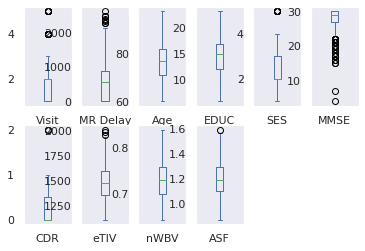

In [ ]:
# creiamo i primi grafici

plt.figure(figsize=(10,10)) #abbiamo usato la default size per le figure e la default dpi per la definizione
alzheimer.plot(kind='box', subplots=True, layout=(2,6), sharex=False, sharey=False)
plt.show()

In [ ]:
# creiamo degli istogrammi per una rappresentazione grafica di ogni variabile del dataset
print("\n\nistogrammi\n")
alzheimer.hist(figsize=(10,10))
plt.show()



istogrammi



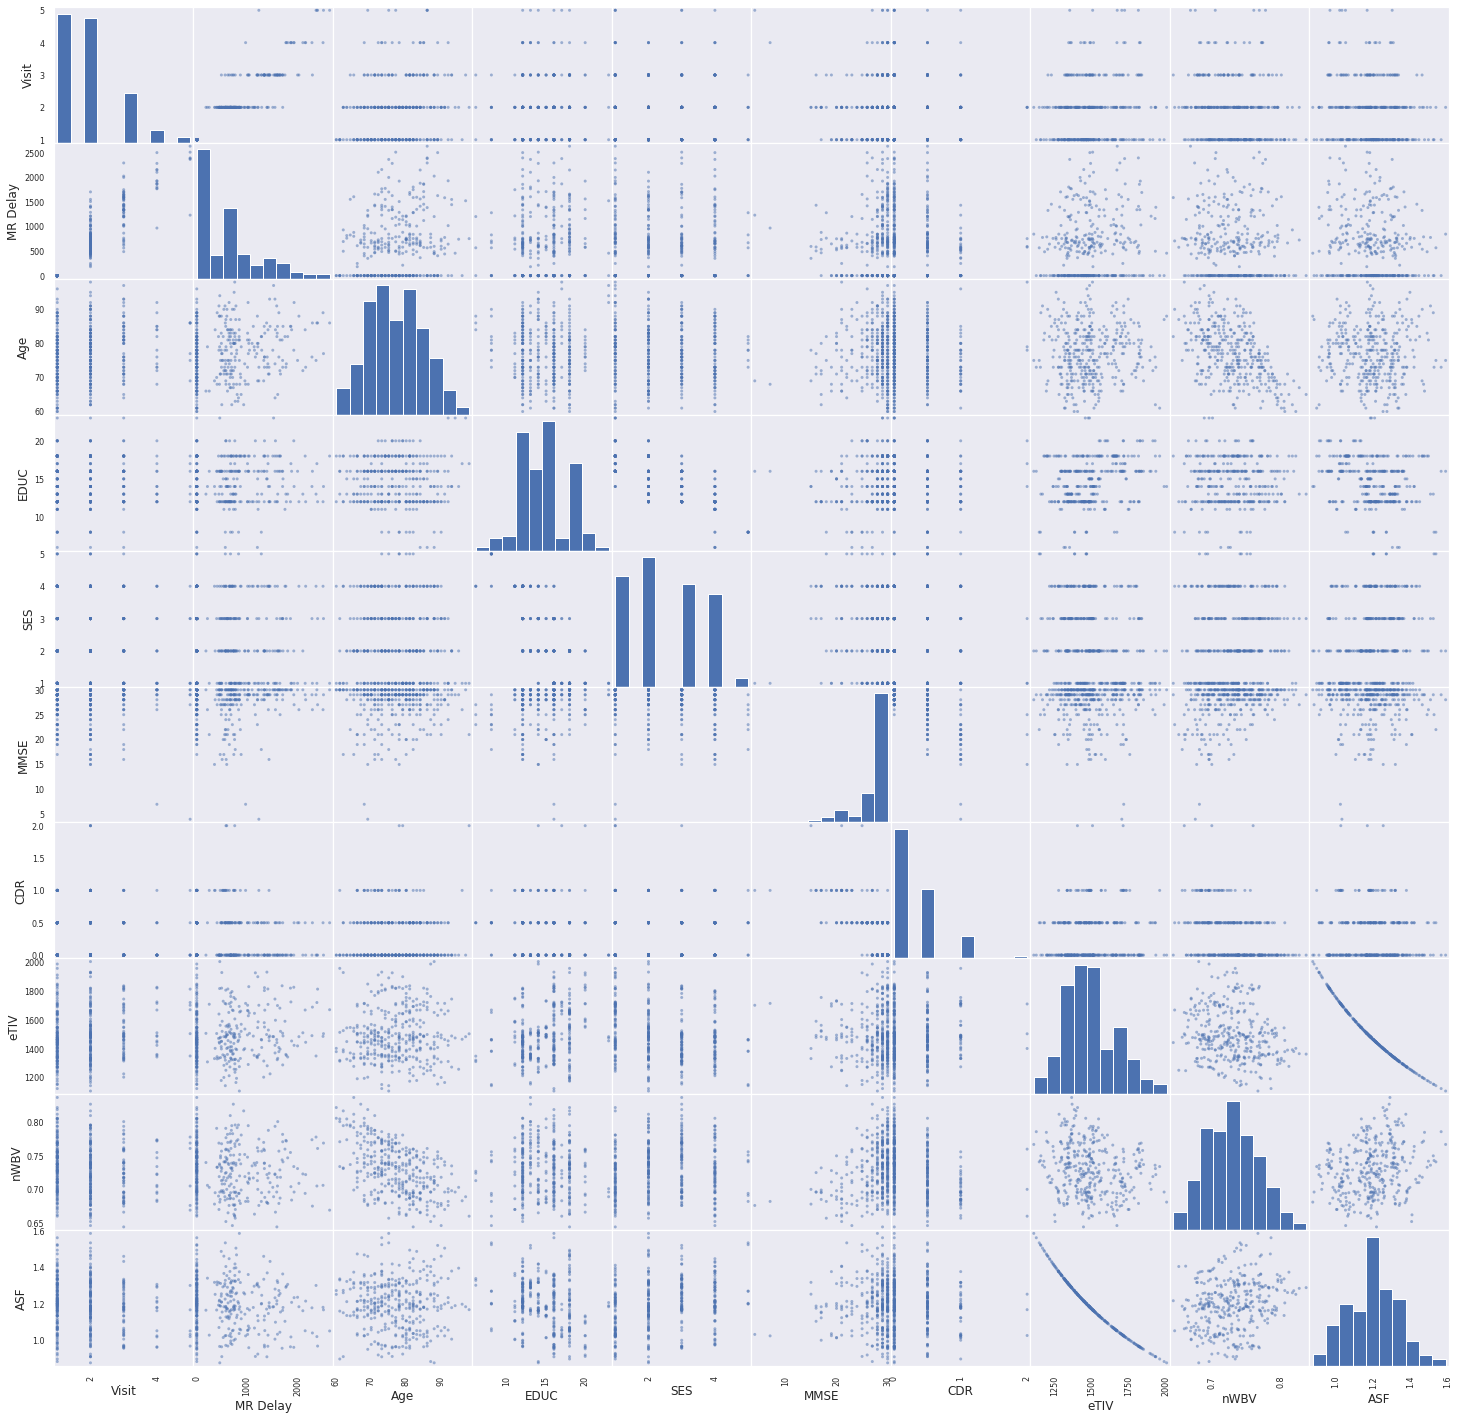

In [ ]:
scatter_matrix(alzheimer, figsize=(25,25))
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


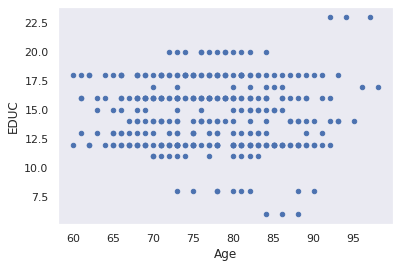

In [ ]:
# Grafici per analizzare relazioni tra diverse variabili del dataset
alzheimer.plot(kind="scatter", x="Age", y="EDUC")
alzheimer.plot(kind="scatter", x="Age", y="CDR")
alzheimer.plot(kind="scatter", x="EDUC", y="nWBV")

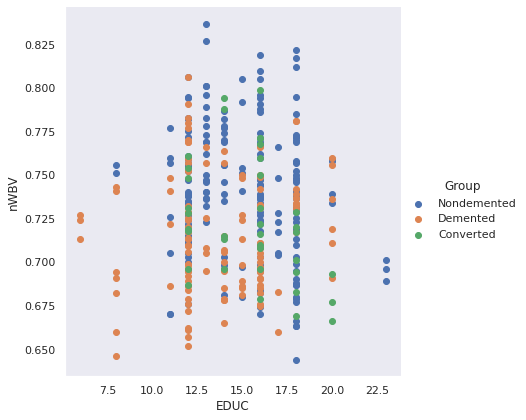

In [ ]:
# ultimo grafico con colori per gruppo di appartenenza
sns.FacetGrid(alzheimer, hue="Group", height=6) \
   .map(plt.scatter, "EDUC", "nWBV") \
   .add_legend()

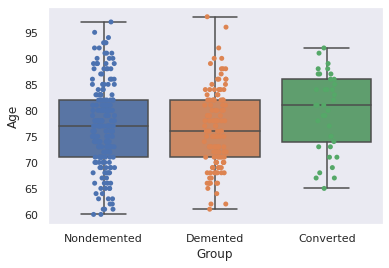

In [ ]:
#sovrappongo due grafici che mettono in relazione l'eta' col gruppo di appartenenza
ax = sns.boxplot(x="Group", y="Age", data=alzheimer)
ax = sns.stripplot(x="Group", y="Age", data=alzheimer, jitter=True, edgecolor="grey")

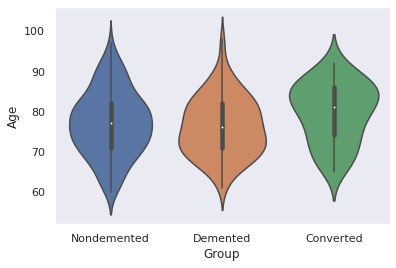

In [ ]:
# utilizzo il violinplot per condensare le informazioni ottenute nel grafico precedente

sns.violinplot(x="Group", y="Age", data=alzheimer, size=6)

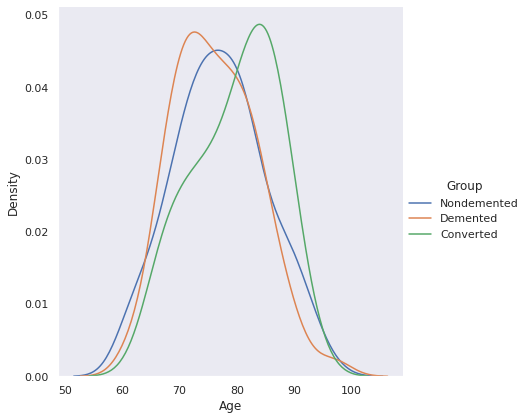

In [ ]:
sns.FacetGrid(alzheimer, hue="Group", height=6) \
   .map(sns.kdeplot, "Age") \
   .add_legend()

Da questi grafici vediamo che nessuna categoria è separabile linearmente dalle altre

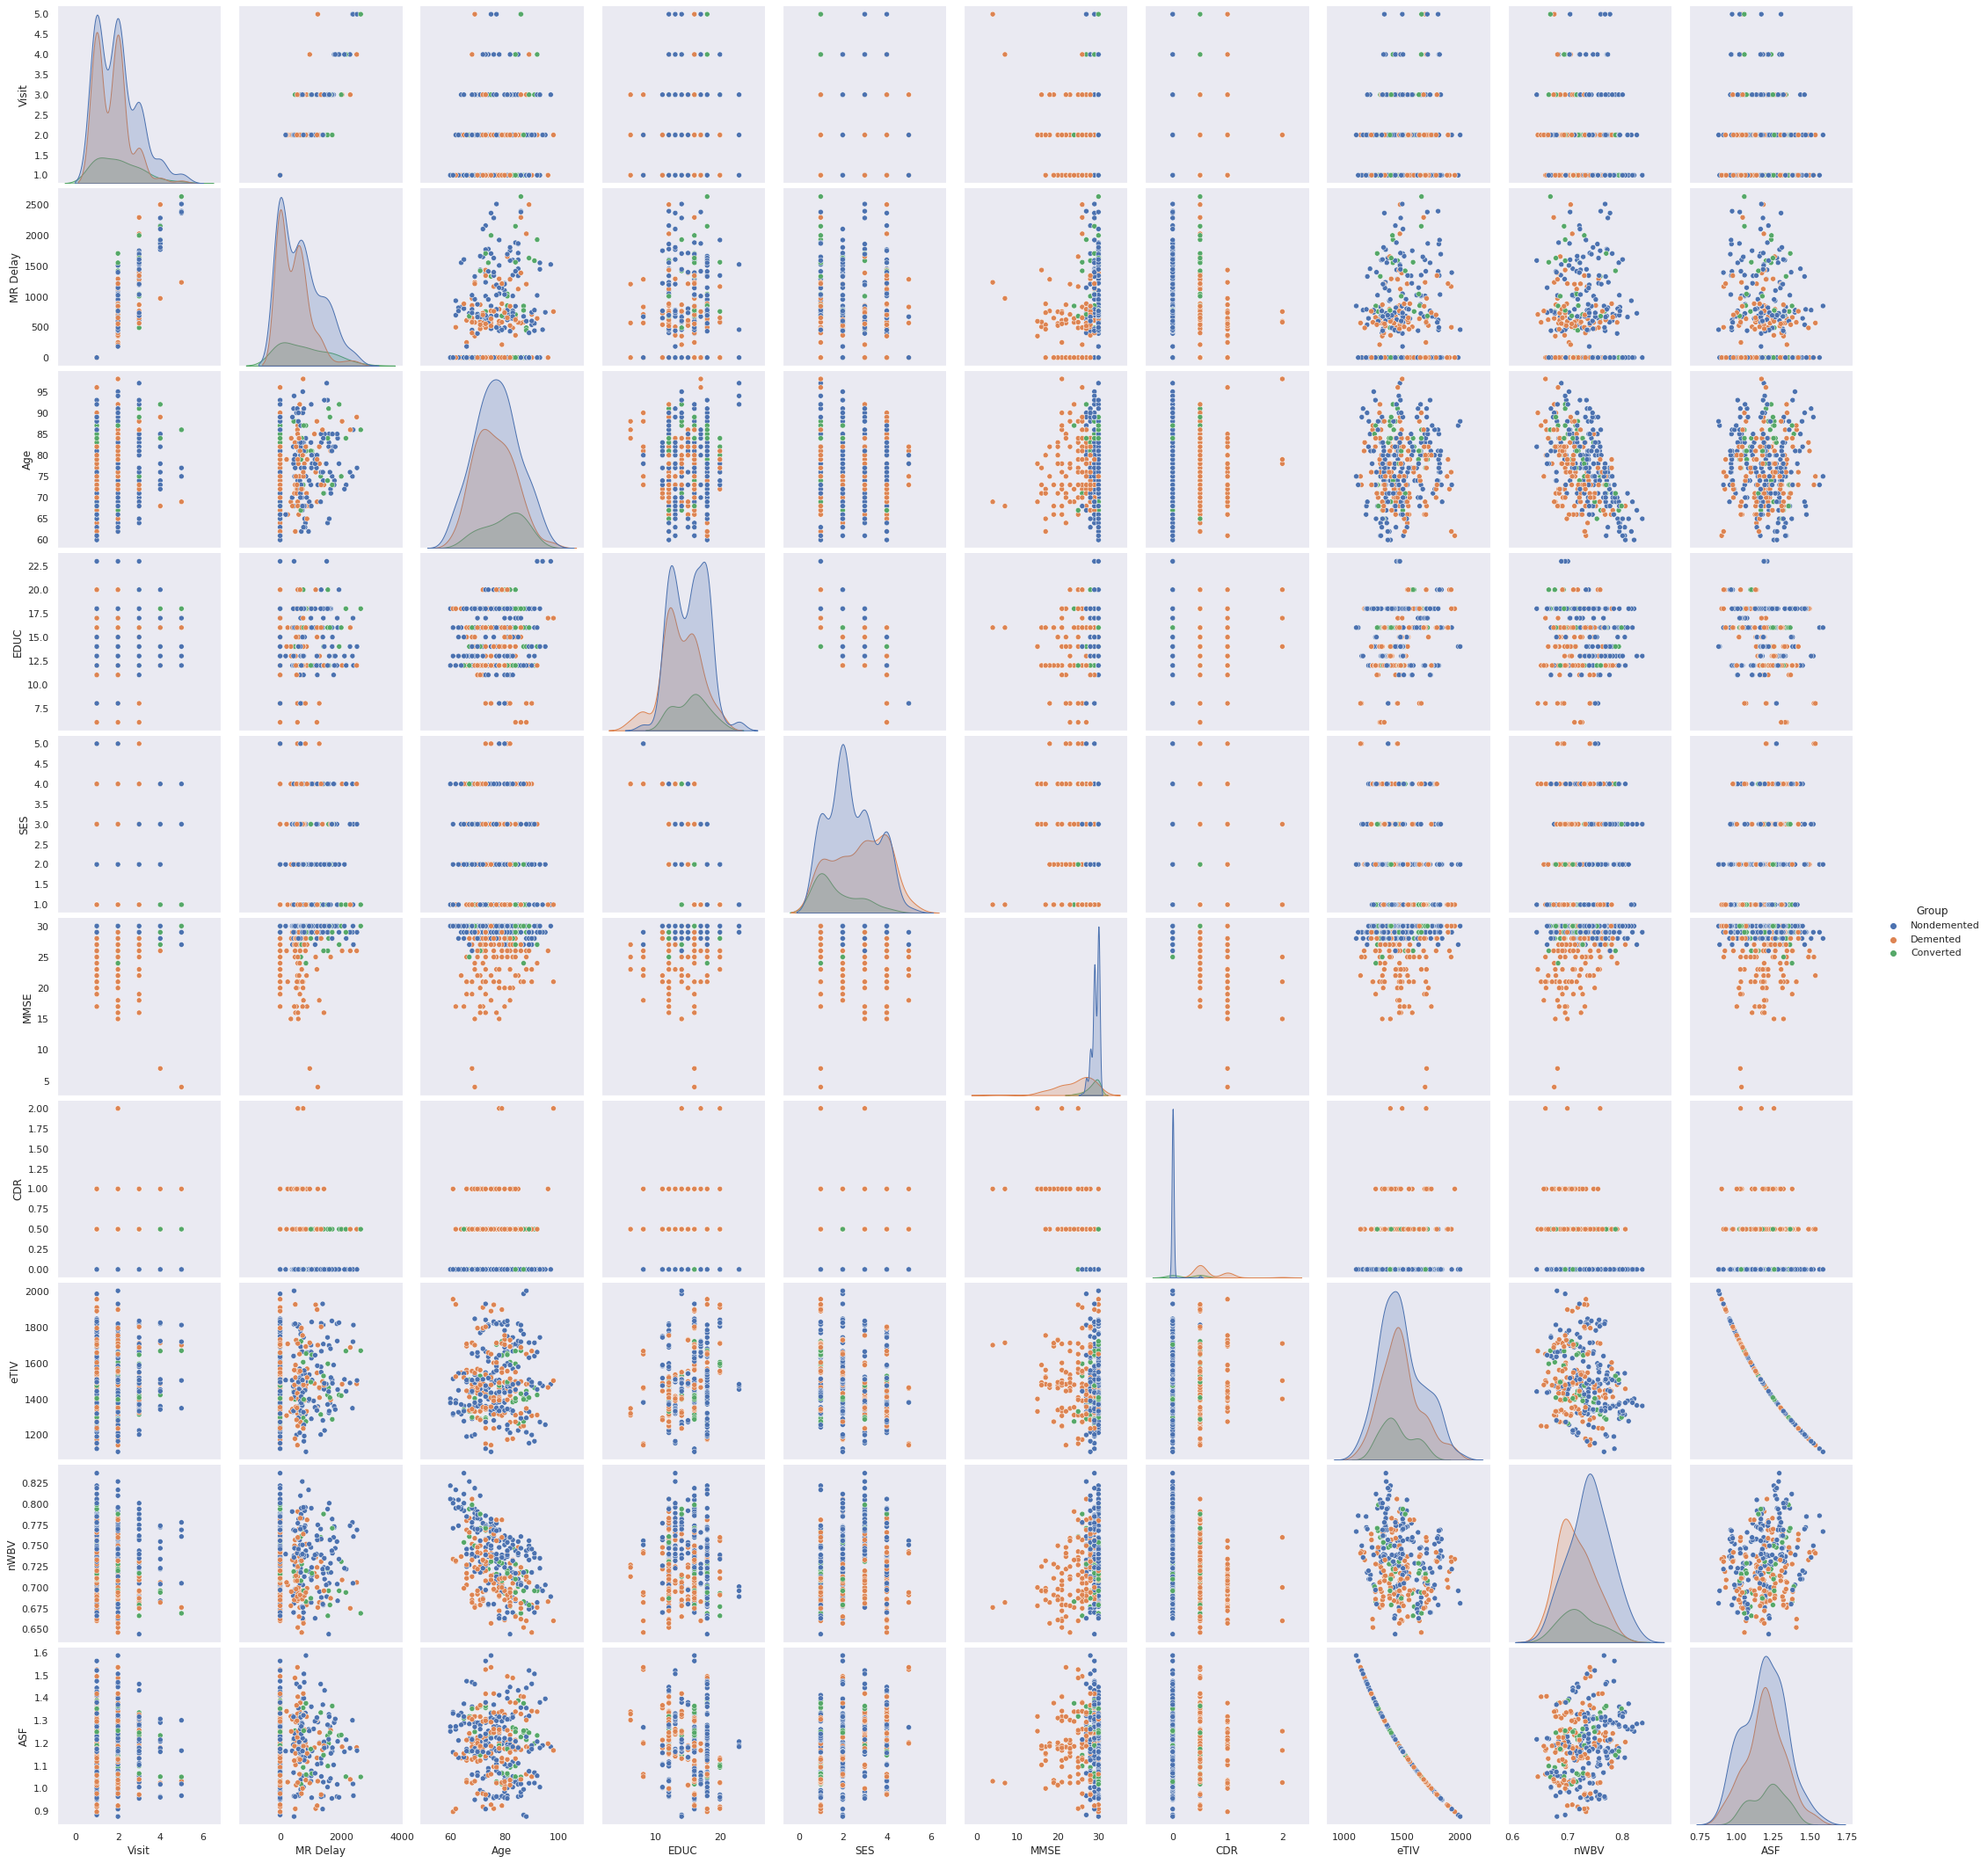

In [ ]:
# Tramite questi grafici possiamo analizzare le relazioni tra i vari gruppi per ogni caratteristica.
# Questo ci servirà per scegliere il modello da utilizzare
sns.pairplot(alzheimer, hue="Group", height=3)

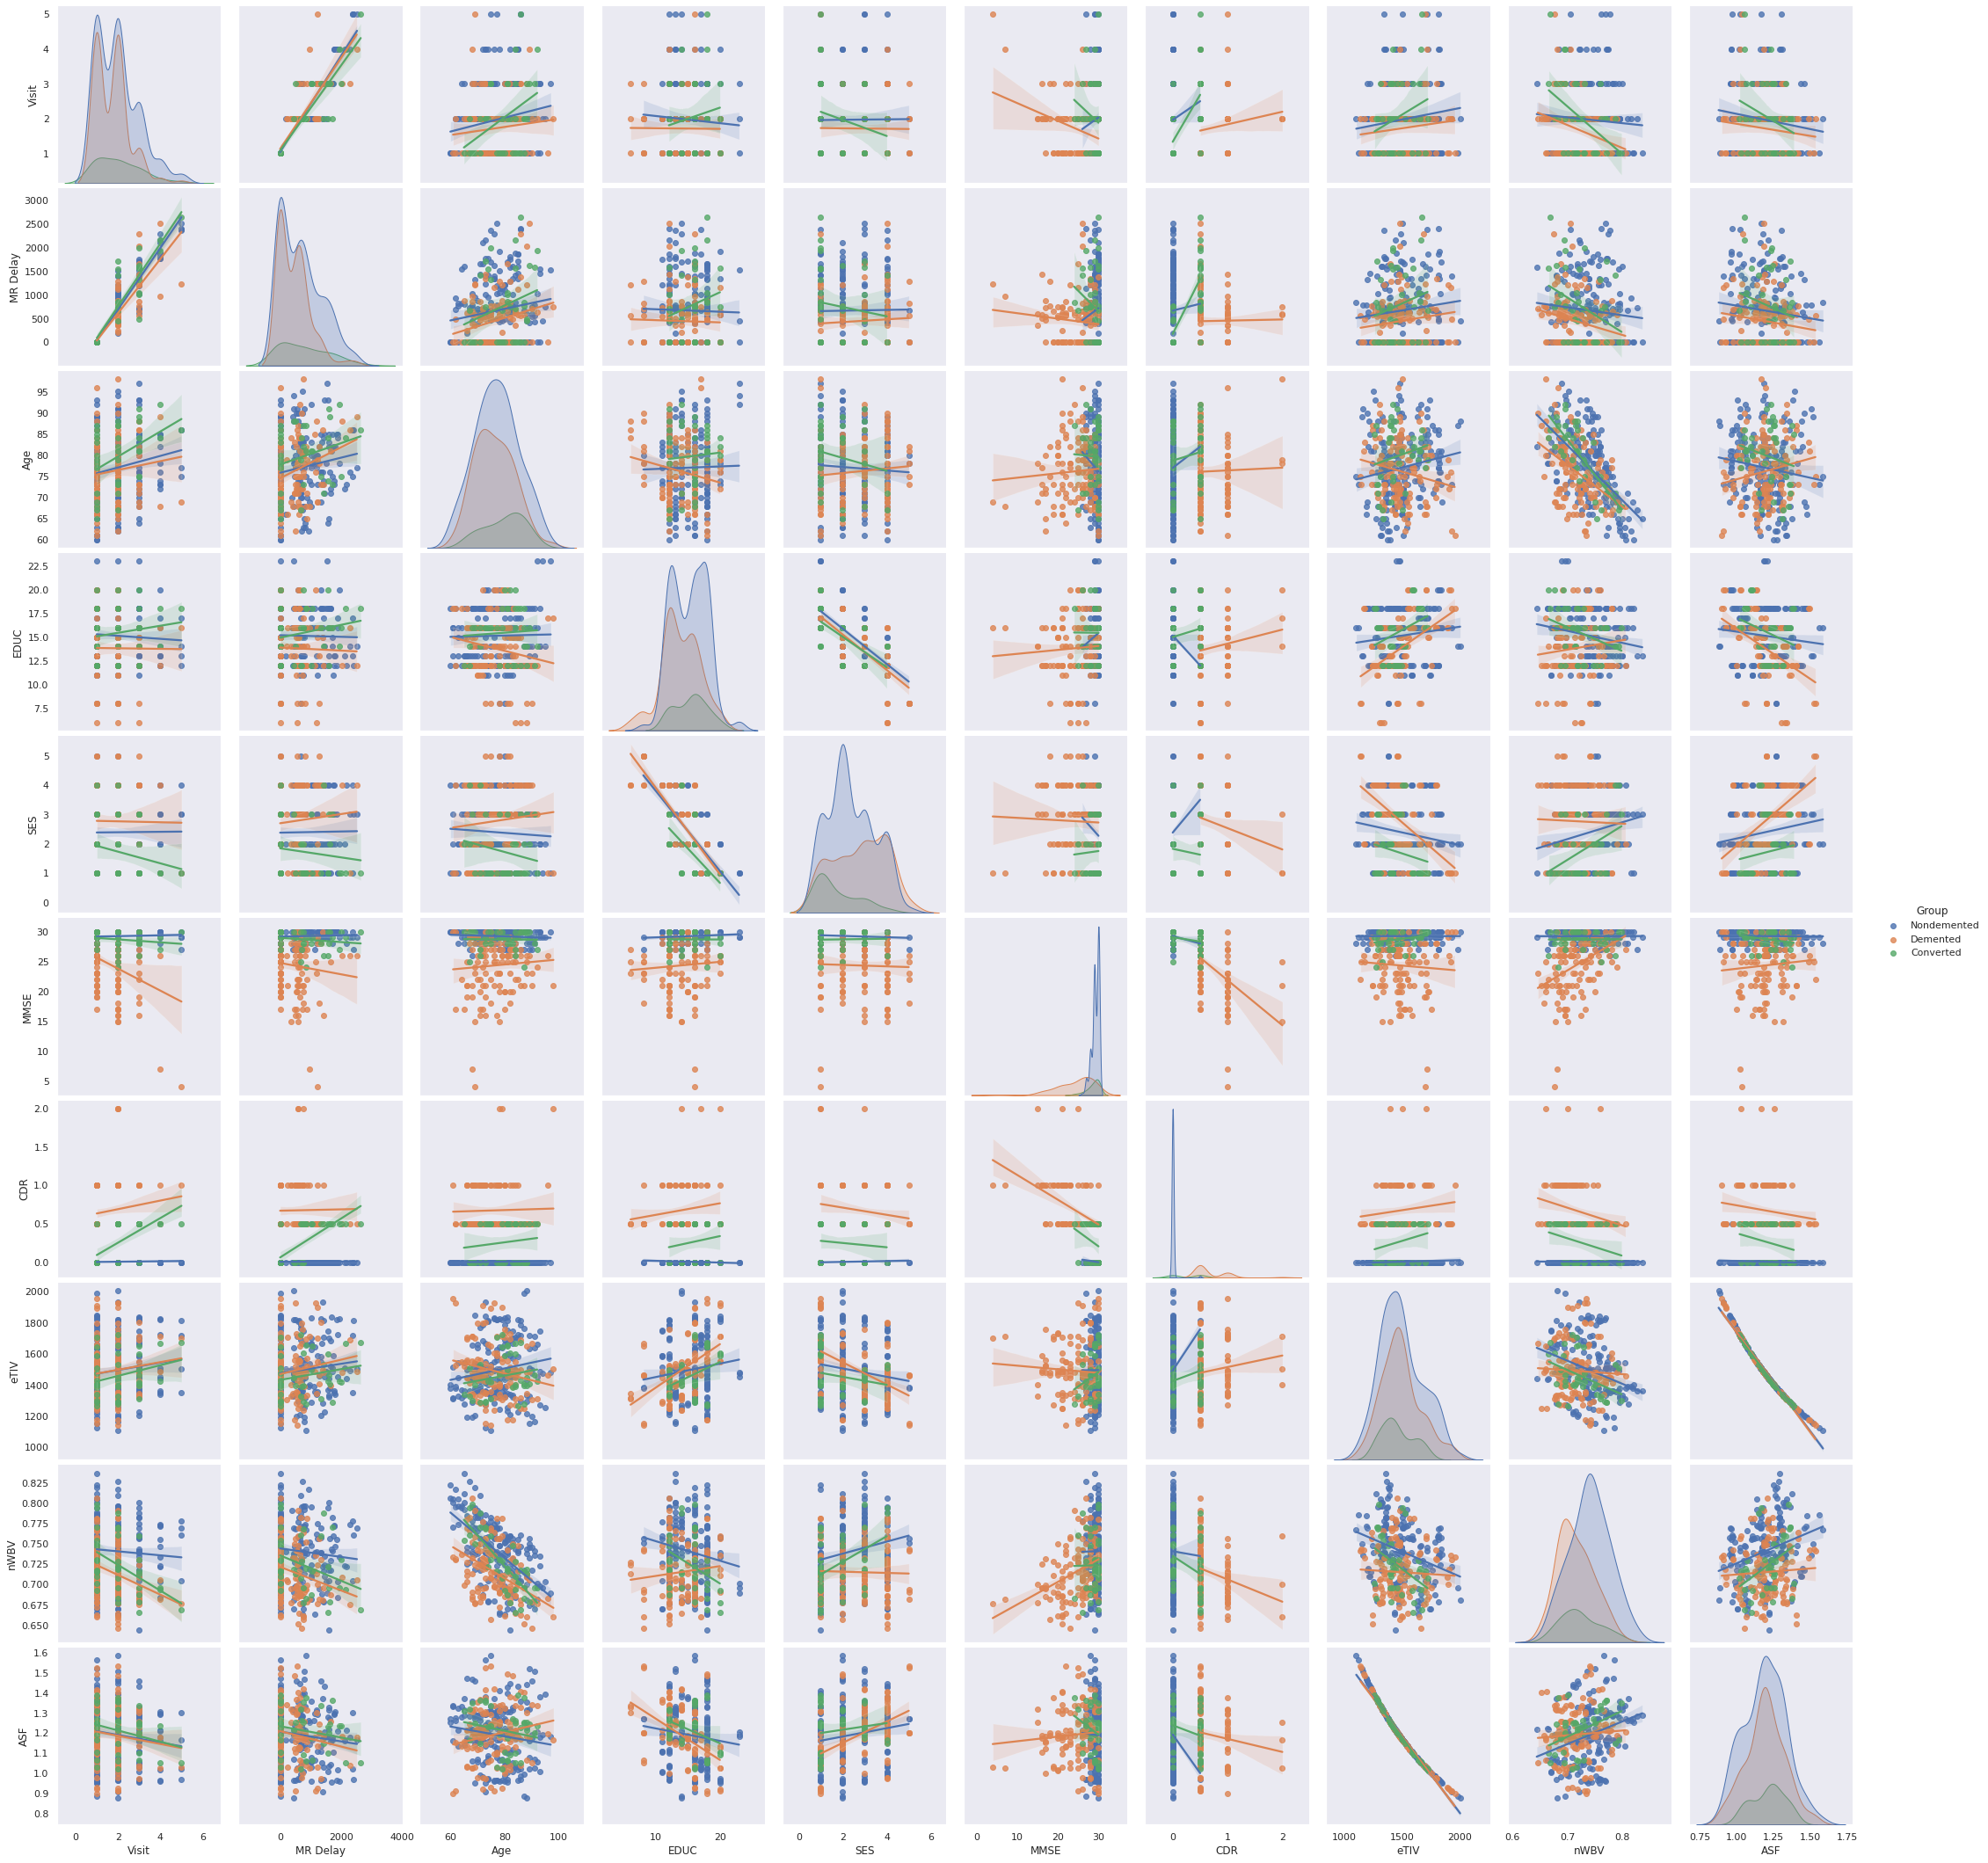

In [ ]:
sns.pairplot(alzheimer, hue="Group", kind="reg", height=3)

#Training e Validation

In [ ]:
#Visto che nessuna delle classi è separabile linearmente dalle altre, abbiamo bisogno di un modello non lineare
array = alzheimer.values
print (type(array))
raw_target = array[:,2] #considero solo i valori della colonna relativa al gruppo
y = np.where(raw_target == 'Demented', 1, 0)
print (y)
X = array[:,7:15] #considero solo alcune colonne del dataset, non fornendo quindi le etichette
test_size = 0.20
seed = 6
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)
#considero diversi modelli per confronatare l'accuracy ottenuta con ognuno di questi
#il primo che considero è un modello non lineare, da cui mi aspetto l'accuracy migliore, 
#visto che i dati non sono separabili linearmente
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_pred,y_test)
print ('                        Predicted')
print ('                   Positive','Negative')
print ('Actually Positive (1): ', cm[1,1], '    ', cm[1,0])
print ('Actually Negative (0): ', cm[0,1], '    ', cm[0,0])

corrette=cm[1,1]+cm[0,0]
tutte = corrette+cm[1,0]+cm[0,1]
print("Accuracy of DT=", round(corrette/tutte*100,4),'%')

#provo ad utilizzare il modello lineare, da cui mi aspetto un'accuracy più bassa
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_pred,y_test)
print ('                        Predicted')
print ('                   Positive','Negative')
print ('Actually Positive (1): ', cm[1,1], '    ', cm[1,0])
print ('Actually Negative (0): ', cm[0,1], '    ', cm[0,0])

corrette=cm[1,1]+cm[0,0]
tutte = corrette+cm[1,0]+cm[0,1]
print("Accuracy of LR=", round(corrette/tutte*100,4),'%')

# creo infine un modello con Support Vector Machine per confrontare due modelli non lineari
model = SVC()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_pred,y_test)
print ('                        Predicted')
print ('                   Positive','Negative')
print ('Actually Positive (1): ', cm[1,1], '    ', cm[1,0])
print ('Actually Negative (0): ', cm[0,1], '    ', cm[0,0])

corrette=cm[1,1]+cm[0,0]
tutte = corrette+cm[1,0]+cm[0,1]
print("Accuracy of SVC=", round(corrette/tutte*100,4),'%')


<class 'numpy.ndarray'>
[0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 0 0 0 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0]
                        Predicted
                   Positive Negative
Actually Positive (1):  17      1
Actually Negative (0):  2      51
Accuracy of DT= 95.7746 %
                        Predicted
                   Positive Negative
Actually Positive (1)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
